In [283]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import OLSResults
import seaborn as sns

In [68]:
def resid_plot(model) :
    e = model.resid
    yhat = model.fittedvalues
    fig, ax = plt.subplots()
    sns.residplot(yhat, e, lowess = True, ax = ax)
    ax.set_xlabel('yhat')
    ax.set_ylabel('e')
    plt.show()

In [337]:
def cooks_plot(model) :
    cooks = OLSInfluence(model).summary_frame()['cooks_d']
    fig, ax = plt.subplots()
    ax.set_ylim(0, np.max(cooks) * 1.25)
    for a, b in zip(np.array(cooks.index), cooks.values) :
        ax.plot([a, a], [0, b], c = 'k')
    plt.show()
    return cooks

<b><font size=4>Question 1</font></b>

In [23]:
mydata=pd.read_csv("http://people.fas.harvard.edu/~mparzen/stat104/condo1.csv")

In [26]:
print ('a)')
lm = smf.ols('price ~ sqfeet + condo', data = mydata).fit()
rse = np.sqrt(lm.scale)
print (lm.params)
print ('RSE:', rse)
lm.summary()

a)
Intercept    66001.328543
sqfeet          90.372033
condo         3629.504589
dtype: float64
RSE: 32186.404744629803


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     5.822
Date:                Fri, 26 Apr 2019   Prob (F-statistic):             0.0119
Time:                        19:04:44   Log-Likelihood:                -234.34
No. Observations:                  20   AIC:                             474.7
Df Residuals:                      17   BIC:                             477.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.6e+04   4.85e+04      1.362      0.191   -3.63e+04    1.68e+05
sqfeet        90.3720     29.530      3.060      0.007      28.070     152.674
condo       3629.5046   1.59e+04      0.228      0.822   -2.99e+04    3.72e+04
==============================================================================
Omnibus:                       18.252   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.605
Skew:                           1.725   Prob(JB):                     3.36e-05
Kurtosis:                       6.581   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print ('a)')
lm2 = smf.ols('price ~ sqfeet + condo + sqfeet*condo', data = mydata).fit()
rse2 = np.sqrt(lm2.scale)
print (lm2.params)
print ('RSE:', rse2)
lm2.summary()

a)
Intercept       148863.876044
sqfeet              38.445010
condo          -167044.175698
sqfeet:condo       100.686155
dtype: float64
RSE: 30211.105967903386


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     5.504
Date:                Fri, 26 Apr 2019   Prob (F-statistic):            0.00861
Time:                        19:19:08   Log-Likelihood:                -232.47
No. Observations:                  20   AIC:                             472.9
Df Residuals:                      16   BIC:                             476.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.489e+05   6.44e+04      2.310      0.035    1.22e+04    2.85e+05
sqfeet          38.4450     39.830      0.965      0.349     -45.990     122.880
condo         -1.67e+05   9.52e+04     -1.755      0.098   -3.69e+05    3.47e+04
sqfeet:condo   100.6862     55.462      1.815      0.088     -16.888     218.260
==============================================================================
Omnibus:                       31.031   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.949
Skew:                           2.550   Prob(JB):                     2.14e-14
Kurtosis:                      10.037   Cond. No.                     3.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b><font size=4>Question 2</font></b>

In [29]:
mydata = pd.read_csv("http://www.datadescant.com/stat104/homer.csv")

a)


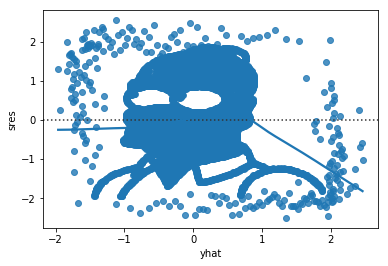

In [32]:
print ('a)')
lm = smf.ols('y ~ x1 + x2 + x3 + x4 + x5 + x6', data = mydata).fit()
e = lm.resid
yhat = lm.fittedvalues
fig, ax = plt.subplots()
sns.residplot(yhat, e, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

In [36]:
print ('b)')
stats.anderson(e)

b)


AndersonResult(statistic=25.58978905179083, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [38]:
print ('c)')
tstat, pval, _, __ = het_breuschpagan(lm.resid, lm.model.exog)
print ('tstat:', tstat)
print ('pval:', pval)

c)
tstat: 53.18148641589949
pval: 1.0785837820698661e-09


<b><font size=4>Question 3</font></b>

In [81]:
mydata=pd.read_csv("http://www.datadescant.com/stat104/running.csv")

a)
Uphill      10
Downhill    10
Flat         5
Name: incline, dtype: int64
           speed     energy
count  25.000000  25.000000
mean   10.524000  10.520000
std     4.869401   4.243034
min     4.400000   3.000000
25%     6.300000   7.800000
50%     8.800000  10.600000
75%    13.800000  13.500000
max    21.400000  18.100000


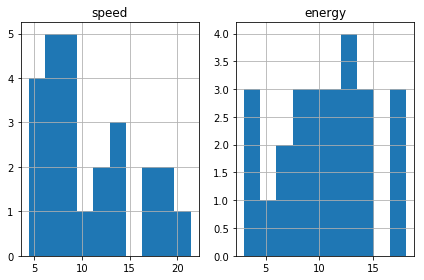

In [87]:
print ('a)')
print (mydata['incline'].value_counts())
print (mydata[['speed', 'energy']].describe())
fig, (ax1, ax2) = plt.subplots(1, 2)
mydata['speed'].hist(ax = ax1)
ax1.set_title('speed')
mydata['energy'].hist(ax = ax2)
ax2.set_title('energy')
plt.tight_layout()
plt.show()

b)


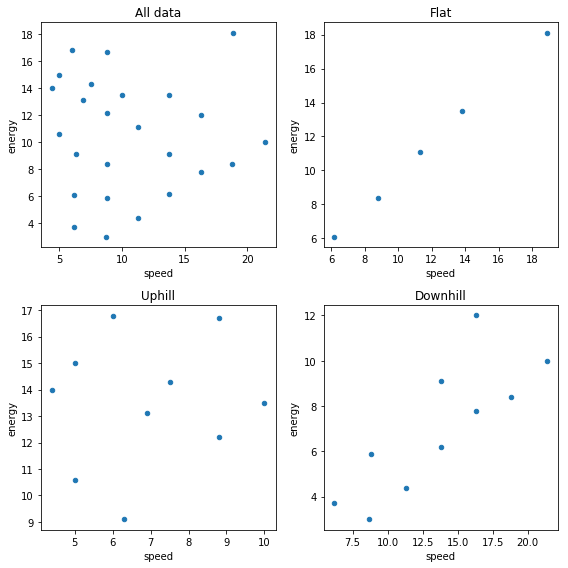

In [85]:
print ('b)')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (8, 8))
mydata.plot.scatter(x = 'speed', y = 'energy', ax = ax0)
mydata[mydata['incline'] == 'Flat'].plot.scatter(x = 'speed', y = 'energy', ax = ax1)
mydata[mydata['incline'] == 'Uphill'].plot.scatter(x = 'speed', y = 'energy', ax = ax2)
mydata[mydata['incline'] == 'Downhill'].plot.scatter(x = 'speed', y = 'energy', ax = ax3)
ax0.set_title('All data')
ax1.set_title('Flat')
ax2.set_title('Uphill')
ax3.set_title('Downhill')
plt.tight_layout()
plt.show()

In [54]:
print ('c)')
lm = smf.ols('energy ~ speed + incline', data = mydata).fit()
rse = np.sqrt(lm.scale)
print (rse)
lm.summary()

c)
2.1895804911667023


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     23.04
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           7.65e-07
Time:                        21:04:50   Log-Likelihood:                -52.887
No. Observations:                  25   AIC:                             113.8
Df Residuals:                      21   BIC:                             118.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9059      1.758     -0.515      0.612      -4.563       2.751
incline[T.Flat]       5.4124      1.217      4.447      0.000       2.881       7.944
incline[T.Uphill]    10.3992      1.262      8.240      0.000       7.775      13.024
speed                 0.5876      0.119      4.922      0.000       0.339       0.836
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.949
Skew:                           0.143   Prob(JB):                        0.622
Kurtosis:                       2.089   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
print ('d)')
lm2 = smf.ols('energy ~ speed*incline', data = mydata).fit()
rse2 = np.sqrt(lm2.scale)
print (rse2)
lm2.summary()

d)
2.0527336200042003


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     16.71
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           2.23e-06
Time:                        21:05:44   Log-Likelihood:                -50.022
No. Observations:                  25   AIC:                             112.0
Df Residuals:                      19   BIC:                             119.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.4668      2.027      0.230      0.820      -3.775       4.708
incline[T.Flat]            -0.2779      3.335     -0.083      0.934      -7.259       6.703
incline[T.Uphill]          11.9451      3.283      3.638      0.002       5.074      18.816
speed                       0.4862      0.142      3.429      0.003       0.189       0.783
speed:incline[T.Flat]       0.4673      0.254      1.841      0.081      -0.064       0.999
speed:incline[T.Uphill]    -0.3234      0.391     -0.828      0.418      -1.141       0.494
==============================================================================
Omnibus:                        0.681   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.063
Skew:                           0.060   Prob(JB):                        0.969
Kurtosis:                       3.215   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b><font size=4>Question 4</font></b>

In [88]:
mydata = pd.read_csv("http://www.datadescant.com/stat104/beef.csv")

a)


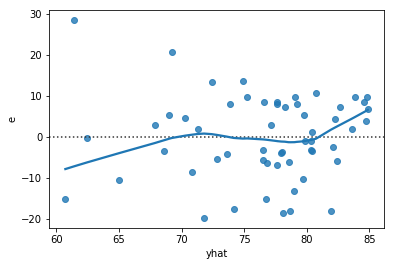

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    YES   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     18.04
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           8.57e-05
Time:                        21:52:40   Log-Likelihood:                -209.21
No. Observations:                  56   AIC:                             422.4
Df Residuals:                      54   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.4899      2.524     33.875      0.000      80.430      90.550
SIZE          -0.2894      0.068     -4.248      0.000      -0.426      -0.153
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.010
Skew:                           0.029   Prob(JB):                        0.995
Kurtosis:                       2.971   Cond. No.                         67.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
print ('a)')
lm = smf.ols('YES ~ SIZE', data = mydata).fit()
resid_plot(lm)
lm.summary()

In [92]:
tstat, pval, _, __ = het_breuschpagan(lm.resid, lm.model.exog)
print ('tstat:', tstat)
print ('pval:', pval)
stats.shapiro(lm.resid)

tstat: 6.906061261185031
pval: 0.008590402078739318


(0.9717090725898743, 0.21021685004234314)

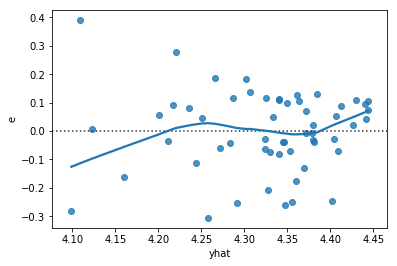

In [93]:
lm2 = smf.ols('np.log(YES) ~ SIZE', data = mydata).fit()
resid_plot(lm2)

In [94]:
tstat2, pval2, _2, __2 = het_breuschpagan(lm2.resid, lm2.model.exog)
print ('tstat:', tstat2)
print ('pval:', pval2)
stats.shapiro(lm2.resid)

tstat: 10.38979675320929
pval: 0.0012671357093331898


(0.9635033011436462, 0.08811922371387482)

<b><font size=4>Question 5</font></b>

In [96]:
mydata=pd.read_csv("http://www.datadescant.com/stat104/monet.csv")

a)


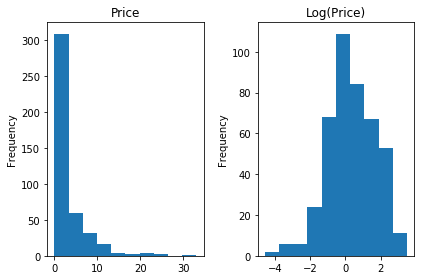

In [103]:
print ('a)')
mydata['LPRICE'] = np.log(mydata['PRICE'])
fig, (ax1, ax2) = plt.subplots(ncols = 2)
mydata['PRICE'].plot.hist(ax = ax1)
ax1.set_title('Price')
mydata['LPRICE'].plot.hist(ax = ax2)
ax2.set_title('Log(Price)')
plt.tight_layout()
plt.show()

In [106]:
print ('b)')
mydata[['HEIGHT', 'WIDTH']].corr()

b)


,HEIGHT,WIDTH
HEIGHT,1.00000,0.50328
WIDTH,0.50328,1.00000


c)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HEIGHT   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     145.2
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           5.44e-29
Time:                        22:05:21   Log-Likelihood:                -1541.1
No. Observations:                 430   AIC:                             3086.
Df Residuals:                     428   BIC:                             3094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0463      1.362      8.847      0.000       9.370      14.722
WIDTH          0.4858      0.040     12.049      0.000       0.407       0.565
==============================================================================
Omnibus:                      201.627   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              921.426
Skew:                           2.077   Prob(JB):                    8.22e-201
Kurtosis:                       8.846   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

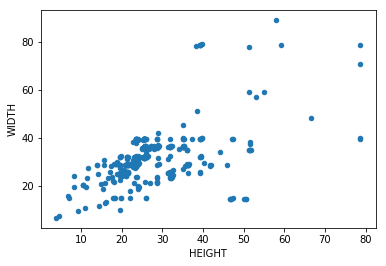

In [108]:
print ('c)')
mydata.plot.scatter(x = 'HEIGHT', y = 'WIDTH')
lm_hw = smf.ols('HEIGHT ~ WIDTH', data = mydata).fit()
lm_hw.summary()

In [110]:
print ('d)')
mydata['AREA'] = mydata['HEIGHT'] * mydata['WIDTH']
lm_a = smf.ols('LPRICE ~ AREA', data = mydata).fit()
lm_a.summary()

d)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LPRICE   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.59e-21
Time:                        22:06:55   Log-Likelihood:                -693.10
No. Observations:                 430   AIC:                             1390.
Df Residuals:                     428   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4886      0.100     -4.863      0.000      -0.686      -0.291
AREA           0.0009   8.68e-05     10.064      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.527   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.321
Skew:                          -0.171   Prob(JB):                        0.190
Kurtosis:                       3.263   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

f)


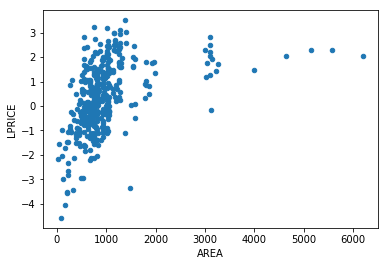

In [112]:
print ('f)')
mydata.plot.scatter(x = 'AREA', y = 'LPRICE')

In [113]:
print ('g)')
mydata['LAREA'] = np.log(mydata['AREA'])
lm_log2 = smf.ols('LPRICE ~ LAREA', data = mydata).fit()
lm_log2.summary()

g)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LPRICE   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.27e-39
Time:                        22:11:46   Log-Likelihood:                -651.51
No. Observations:                 430   AIC:                             1307.
Df Residuals:                     428   BIC:                             1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5256      0.608    -14.033      0.000      -9.720      -7.331
LAREA          1.3261      0.091     14.637      0.000       1.148       1.504
==============================================================================
Omnibus:                        0.552   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.356
Skew:                           0.001   Prob(JB):                        0.837
Kurtosis:                       3.141   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

h)


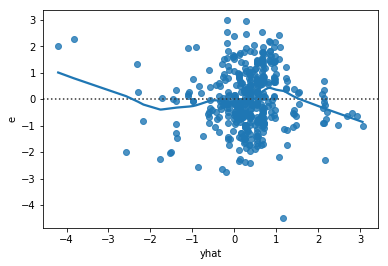

In [114]:
print ('h)')
resid_plot(lm_log2)

In [115]:
print ('i)')
lm_log2_sign = smf.ols('LPRICE ~ LAREA + SIGNED', data = mydata).fit()
lm_log2_sign.summary()

i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LPRICE   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     183.5
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           3.07e-58
Time:                        22:15:29   Log-Likelihood:                -605.41
No. Observations:                 430   AIC:                             1217.
Df Residuals:                     427   BIC:                             1229.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6933      0.558    -17.356      0.000     -10.791      -8.596
LAREA          1.3458      0.082     16.512      0.000       1.186       1.506
SIGNED         1.2618      0.125     10.105      0.000       1.016       1.507
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.672
Skew:                           0.087   Prob(JB):                        0.715
Kurtosis:                       2.916   Cond. No.                         80.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
print ('j)')
lm_log2_sign = smf.ols('LPRICE ~ LAREA + SIGNED + SIGNED*LAREA', data = mydata).fit()
lm_log2_sign.summary()

j)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LPRICE   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           5.63e-58
Time:                        22:18:25   Log-Likelihood:                -603.26
No. Observations:                 430   AIC:                             1215.
Df Residuals:                     426   BIC:                             1231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.9357      0.819    -13.358      0.000     -12.545      -9.327
LAREA            1.5310      0.121     12.670      0.000       1.293       1.768
SIGNED           3.5213      1.099      3.204      0.001       1.361       5.682
SIGNED:LAREA    -0.3375      0.163     -2.069      0.039      -0.658      -0.017
==============================================================================
Omnibus:                        0.472   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.466
Skew:                           0.080   Prob(JB):                        0.792
Kurtosis:                       2.975   Cond. No.                         244.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

k)


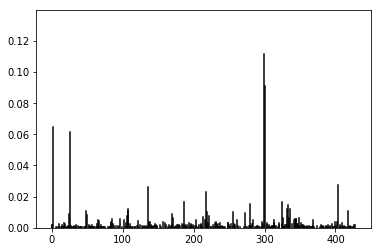

avg price: 3.0899962627906974


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,LPRICE,AREA,LAREA
299,0.214306,4.6,7.5,1,254,2,-1.540350,34.50,3.540959
300,0.112537,3.9,6.7,1,255,2,-2.184473,26.13,3.263084


In [155]:
print ('k)')
cooks_plot(lm_log2_sign)
print ('avg price:', mydata['PRICE'].mean())
mydata[cooks > 0.08]

<b><font size=4>Question 6</font></b>

In [197]:
mydata=pd.read_csv("http://www.datadescant.com/stat104/SMSA.csv")

In [279]:
mydata = pd.read_csv('/Users/jbachlombardo/Documents/Personal/HES - Stats 104/Homeworks/HW8/smsa.csv')
mydata = mydata.dropna()

In [238]:
mydata[mydata['income'].isnull()]

,JanTemp,JulyTemp,RelHum,Rain,Mortality,Education,PopDensity,PercNonWhite,PercWC,pop,pop_house,income,HCPot,S02Pot
20,45,85,53,31,891.71,11.4,1844,11.5,48.1,NaN,3.22,NaN,1,1


In [239]:
mydata = mydata[mydata['income'].notnull()]

In [244]:
lm0 = smf.ols('Mortality ~ JanTemp + JulyTemp + RelHum + Rain + Education + PopDensity + PercNonWhite + PercWC + pop + pop_house + income + HCPot + S02Pot', data = mydata).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     10.55
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           9.79e-10
Time:                        23:11:17   Log-Likelihood:                -285.87
No. Observations:                  59   AIC:                             599.7
Df Residuals:                      45   BIC:                             628.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1394.8564    283.662      4.917      0.000     823.531    1966.181
JanTemp         -1.4569      0.769     -1.894      0.065      -3.006       0.092
JulyTemp        -3.0336      1.948     -1.557      0.126      -6.957       0.890
RelHum           0.0262      1.156      0.023      0.982      -2.302       2.355
Rain             1.1516      0.572      2.014      0.050      -0.000       2.304
Education      -10.3078      9.045     -1.140      0.260     -28.526       7.911
PopDensity       0.0046      0.004      1.049      0.300      -0.004       0.013
PercNonWhite     5.3898      0.911      5.919      0.000       3.556       7.224
PercWC          -1.7157      1.229     -1.396      0.170      -4.191       0.760
pop           3.099e-06   4.14e-06      0.749      0.458   -5.24e-06    1.14e-05
pop_house      -35.4428     40.519     -0.875      0.386    -117.052      46.167
income          -0.0003      0.001     -0.253      0.801      -0.003       0.002
HCPot           -0.0964      0.094     -1.031      0.308      -0.285       0.092
S02Pot           0.2081      0.097      2.152      0.037       0.013       0.403
==============================================================================
Omnibus:                        9.818   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.035
Skew:                           0.767   Prob(JB):                      0.00662
Kurtosis:                       4.314   Cond. No.                     1.31e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
x_cols = list(mydata.columns)
x_cols.remove('Mortality')

In [245]:
print ('VIFs')
for i, x in enumerate(x_cols) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm0.model.exog, i+1)))

VIFs
JanTemp: 2.850694293149015
JulyTemp: 3.7568387299089236
RelHum: 1.8086747136533747
Rain: 2.0478694750600144
Education: 2.7676126647481234
PopDensity: 1.8528118473542625
PercNonWhite: 3.137247450927162
PercWC: 1.8150856449756707
pop: 1.9034196902701894
pop_house: 2.56782372360579
income: 1.5768309640463207
HCPot: 3.5110432510395917
S02Pot: 1.76589764500029


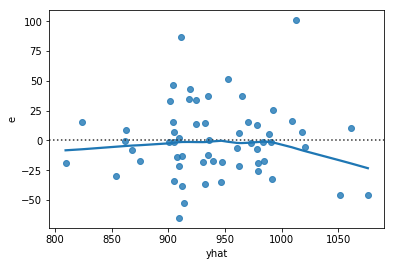

In [246]:
resid_plot(lm0)

In [290]:
def stepwise_by_pval(data, y_col, thresh = 0.05) :
    """Function to perform stepwise regression at p-value threshold of 0.05"""
    dropped_list = list()
    y = data[y_col]
    x_cols = list(data.columns)
    x_cols.remove(y_col)
    X = sm.add_constant(data[x_cols])
    while True :
        lm = sm.OLS(y, X).fit()
        pvals = lm.pvalues
        if pvals.max() > thresh :
            drop_name = pvals.idxmax()
            X = X.drop(drop_name, axis = 1)
            dropped_list.append((drop_name, pvals.loc[drop_name]))
            continue
        else :
            break
    return (lm, lm.params, np.sqrt(lm.scale), dropped_list)

In [291]:
lm, params, se, dropped = stepwise_by_pval(mydata, 'Mortality')

In [292]:
print ('Dropped x-vars (in order) w/ p-val:')
dropped

Dropped x-vars (in order) w/ p-val:


[('RelHum', 0.9820495639635662),
 ('income', 0.7996663273787561),
 ('pop', 0.46561346621843436),
 ('pop_house', 0.34876272152755805),
 ('HCPot', 0.48400353663161655),
 ('Education', 0.3243433044360988),
 ('JulyTemp', 0.11761677328040446),
 ('PopDensity', 0.06755368531219762),
 ('PercWC', 0.06234161700513251)]

In [293]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     29.45
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           5.23e-13
Time:                        11:36:52   Log-Likelihood:                -292.97
No. Observations:                  59   AIC:                             595.9
Df Residuals:                      54   BIC:                             606.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          870.1434     25.050     34.736      0.000     819.921     920.366
JanTemp         -1.8220      0.543     -3.356      0.001      -2.911      -0.733
Rain             1.6176      0.444      3.644      0.001       0.728       2.508
PercNonWhite     4.4358      0.654      6.783      0.000       3.125       5.747
S02Pot           0.3227      0.079      4.077      0.000       0.164       0.481
==============================================================================
Omnibus:                        7.613   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.991
Skew:                           0.670   Prob(JB):                       0.0303
Kurtosis:                       4.024   Cond. No.                         486.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
print ('RSE: {}'.format(se))

RSE: 36.26726485172626


In [296]:
tstat, pval, _, __ = het_breuschpagan(lm.resid, lm.model.exog)
print ('tstat:', tstat)
print ('pval:', pval)

tstat: 4.9615658381338354
pval: 0.2912638639061471


In [297]:
stats.shapiro(lm.resid)

(0.9670473337173462, 0.11005695909261703)

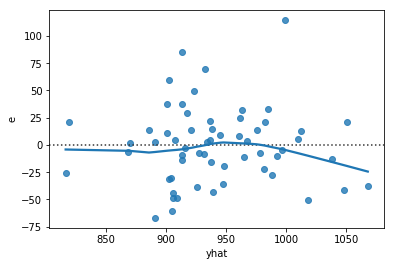

In [298]:
resid_plot(lm)

<b><font size=4>Question 7</font></b>

In [299]:
mydata = pd.read_csv("http://www.datadescant.com/stat104/mn_trump_vote.csv")

a)


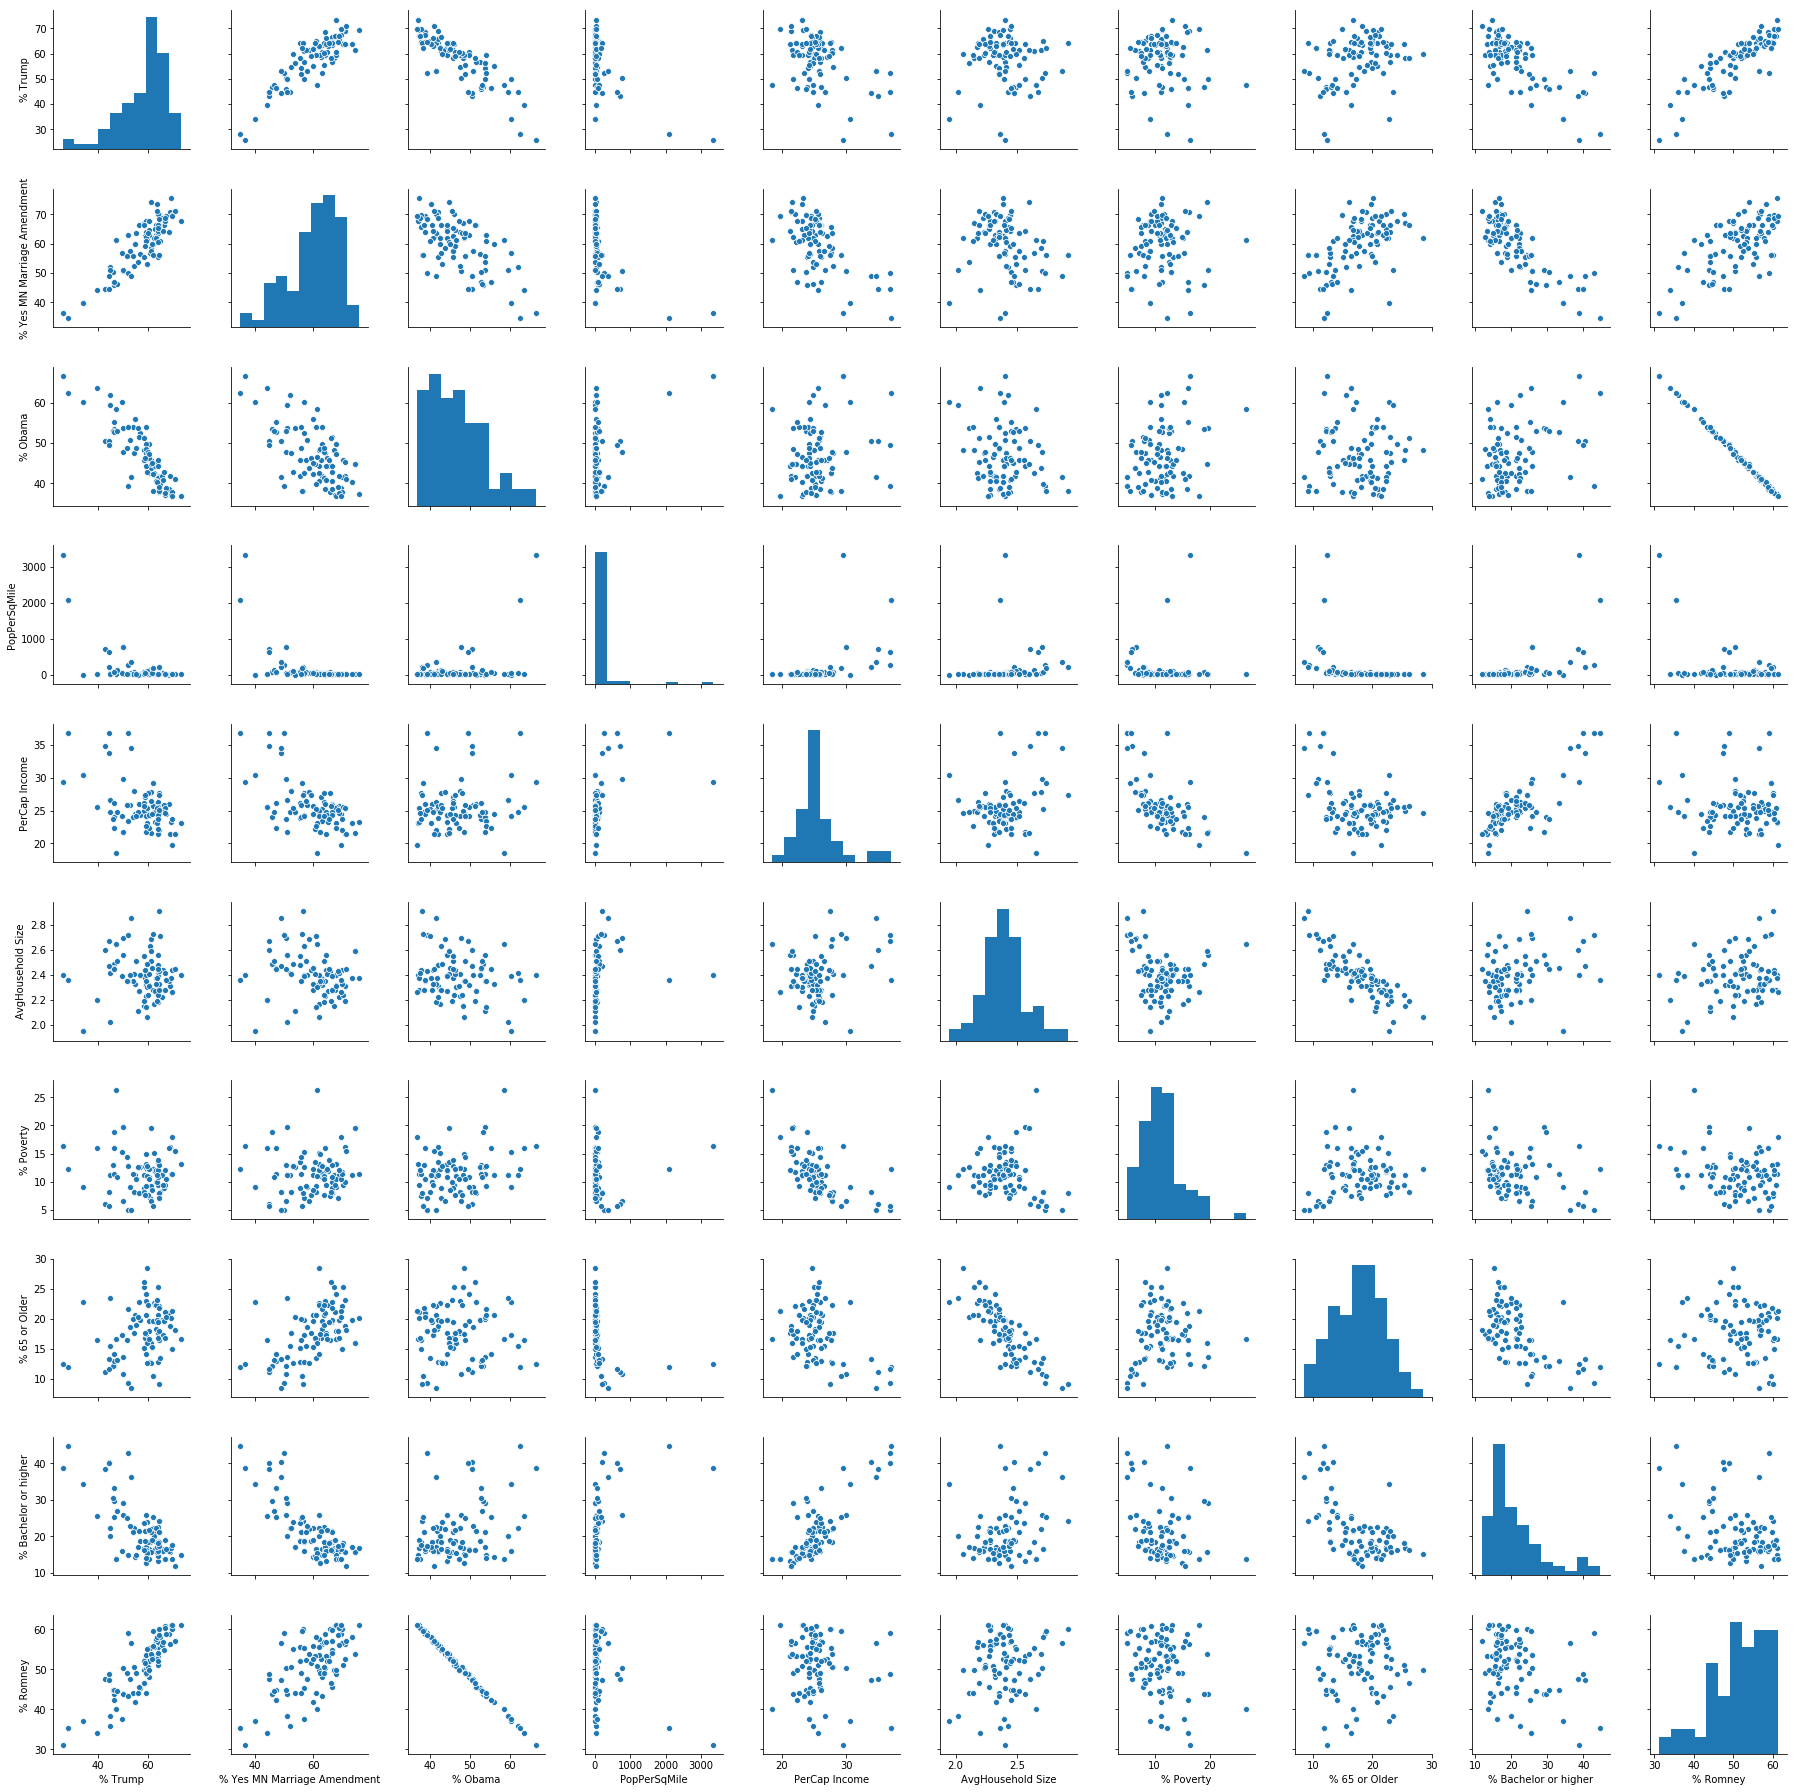

In [266]:
print ('a)')
sns.pairplot(mydata.iloc[:, 5:])

In [300]:
mydata.iloc[:, 5:].corr()

,% Trump,% Yes MN Marriage Amendment,% Obama,PopPerSqMile,PerCap Income,AvgHousehold Size,% Poverty,% 65 or Older,% Bachelor or higher,% Romney
% Trump,1.000000,0.868812,-0.860301,-0.578499,-0.478575,-0.030729,-0.078530,0.328592,-0.723185,0.858695
% Yes MN Marriage Amendment,0.868812,1.000000,-0.645417,-0.530413,-0.585236,-0.224178,0.062179,0.562054,-0.806452,0.648550
% Obama,-0.860301,-0.645417,1.000000,0.371917,0.111447,-0.220152,0.257326,-0.017683,0.335063,-0.998943
PopPerSqMile,-0.578499,-0.530413,0.371917,1.000000,0.474664,0.159287,0.012085,-0.357909,0.558102,-0.368572
PerCap Income,-0.478575,-0.585236,0.111447,0.474664,1.000000,0.271159,-0.616667,-0.412454,0.794795,-0.108418
AvgHousehold Size,-0.030729,-0.224178,-0.220152,0.159287,0.271159,1.000000,-0.170191,-0.817828,0.316809,0.221219
% Poverty,-0.078530,0.062179,0.257326,0.012085,-0.616667,-0.170191,1.000000,0.112176,-0.226704,-0.251938
% 65 or Older,0.328592,0.562054,-0.017683,-0.357909,-0.412454,-0.817828,0.112176,1.000000,-0.589269,0.020742
% Bachelor or higher,-0.723185,-0.806452,0.335063,0.558102,0.794795,0.316809,-0.226704,-0.589269,1.000000,-0.333024
% Romney,0.858695,0.648550,-0.998943,-0.368572,-0.108418,0.221219,-0.251938,0.020742,-0.333024,1.000000


In [325]:
print ('b)')
features = list(mydata.columns[5:])
y_col = '% Trump'
features.remove(y_col)
y = mydata[y_col]
X = mydata[features]
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
print ('VIFs\n')
for i, x in enumerate(features) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm.model.exog, i+1)))
lm.summary()

b)
VIFs

% Yes MN Marriage Amendment: 7.670229665696777
% Obama: 547.2474952116485
PopPerSqMile: 1.745735938123983
PerCap Income: 7.214192317959646
AvgHousehold Size: 4.271177896195484
% Poverty: 2.870499394687188
% 65 or Older: 6.809538731094268
% Bachelor or higher: 6.701960292094665
% Romney: 554.4367827415701


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                % Trump   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     208.7
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           2.67e-50
Time:                        11:48:50   Log-Likelihood:                -175.03
No. Observations:                  87   AIC:                             370.1
Df Residuals:                      77   BIC:                             394.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         103.9151     65.413      1.589      0.116     -26.338     234.168
% Yes MN Marriage Amendment     0.1358      0.066      2.073      0.041       0.005       0.266
% Obama                        -0.7799      0.694     -1.123      0.265      -2.162       0.603
PopPerSqMile                   -0.0013      0.001     -2.010      0.048      -0.003   -1.21e-05
PerCap Income                  -0.1662      0.161     -1.033      0.305      -0.487       0.154
AvgHousehold Size              -1.9290      2.468     -0.782      0.437      -6.844       2.986
% Poverty                      -0.1064      0.098     -1.090      0.279      -0.301       0.088
% 65 or Older                  -0.0580      0.127     -0.456      0.650      -0.311       0.195
% Bachelor or higher           -0.4198      0.073     -5.759      0.000      -0.565      -0.275
% Romney                        0.0490      0.692      0.071      0.944      -1.329       1.427
==============================================================================
Omnibus:                        2.254   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                2.123
Skew:                          -0.299   Prob(JB):                        0.346
Kurtosis:                       2.522   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
print ('c)')
lm, params, se, dropped = stepwise_by_pval(mydata.iloc[:, 5:], '% Trump')
print ('Coefficients\n', params)
print ('RSE:', se)
print ('Dropped (in order w/ pval)\n', dropped)
lm.summary()

c)
Coefficients
 const                          98.477699
% Yes MN Marriage Amendment     0.132755
% Obama                        -0.823850
PopPerSqMile                   -0.001501
% Bachelor or higher           -0.462067
dtype: float64
RSE: 1.888552979889555
Dropped (in order w/ pval)
 [('% Romney', 0.9437015992731006), ('% 65 or Older', 0.6510720811546413), ('AvgHousehold Size', 0.47487082295400995), ('% Poverty', 0.27682497917324717), ('PerCap Income', 0.6494159322173739)]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                % Trump   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     486.4
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           3.06e-56
Time:                        11:52:30   Log-Likelihood:                -176.19
No. Observations:                  87   AIC:                             362.4
Df Residuals:                      82   BIC:                             374.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          98.4777      5.595     17.600      0.000      87.347     109.609
% Yes MN Marriage Amendment     0.1328      0.053      2.498      0.014       0.027       0.238
% Obama                        -0.8239      0.042    -19.392      0.000      -0.908      -0.739
PopPerSqMile                   -0.0015      0.001     -2.563      0.012      -0.003      -0.000
% Bachelor or higher           -0.4621      0.054     -8.577      0.000      -0.569      -0.355
==============================================================================
Omnibus:                        1.874   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.873
Skew:                          -0.337   Prob(JB):                        0.392
Kurtosis:                       2.752   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
print ("c) cont'd")
print ('\nVIFs\n')
for i, x in enumerate(list(params[1:].index)) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm.model.exog, i+1)))

c) cont'd

VIFs

% Yes MN Marriage Amendment: 5.234363825570738
% Obama: 2.125191711055893
PopPerSqMile: 1.538511008167264
% Bachelor or higher: 3.795571713764801


d)


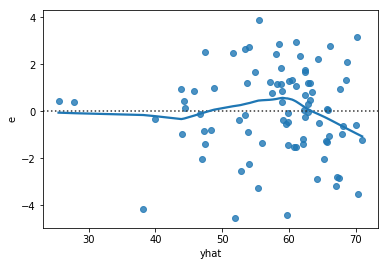

In [336]:
print ('d)')
resid_plot(lm)

e)


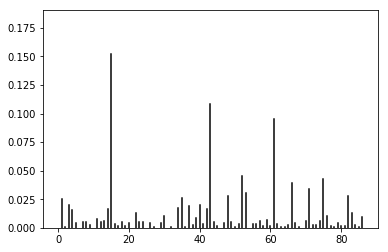

,FIPS Code,County,State,Num Trump Votes,Total Votes Cast,% Trump,% Yes MN Marriage Amendment,% Obama,PopPerSqMile,PerCap Income,AvgHousehold Size,% Poverty,% 65 or Older,% Bachelor or higher,% Romney
15,27031,"Cook County, MN",MN,1156,3395,34.05,39.90,60.3,3.6,30.501,1.95,9.1,22.8,34.4,37.0
43,27087,"Mahnomen County, MN",MN,991,2088,47.46,61.36,58.6,9.7,18.533,2.65,26.4,16.7,13.7,40.0
61,27123,"Ramsey County, MN",MN,70894,273143,25.95,36.45,66.6,3341.7,29.437,2.40,16.4,12.4,38.8,31.2


In [338]:
print ('e)')
cooks = cooks_plot(lm)
mydata[cooks > 0.08]

<b><font size=4>Question 8</font></b>

In [339]:
mydata=pd.read_csv("http://www.datadescant.com/stat104/florida2000.csv")

a)


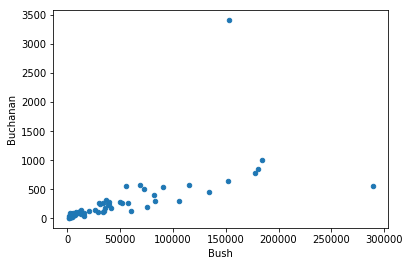

In [341]:
print ('a)')
mydata.plot.scatter(x = 'Bush', y = 'Buchanan')

In [397]:
print ('b)')
mydata_nopalm = mydata[mydata['Palm_Beach'] == 0]
lm_A = smf.ols('Buchanan ~ Bush', data = mydata_nopalm).fit()
print ('Se:', np.sqrt(lm_A.scale))
lm_A.summary()

b)
Se: 112.2667922259637


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Buchanan   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           4.11e-21
Time:                        13:42:52   Log-Likelihood:                -404.21
No. Observations:                  66   AIC:                             812.4
Df Residuals:                      64   BIC:                             816.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0813     17.294      3.821      0.000      31.533     100.630
Bush           0.0035      0.000     13.974      0.000       0.003       0.004
==============================================================================
Omnibus:                       22.744   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.834
Skew:                          -0.593   Prob(JB):                     2.87e-28
Kurtosis:                       9.687   Cond. No.                     8.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
print ('c)')
bush_votes_palm = mydata[mydata['Palm_Beach'] == 1]['Bush']
print ('Bush votes:', bush_votes_palm.item())
print ('Se lm_A:', np.sqrt(lm_A.scale))
print ('predicted:', lm_A.predict(bush_votes_palm).item())
print ('high:', 66.1 + (lm_A.params[1]*152954) + 1.96*np.sqrt(lm_A.scale))
print ('low:', 66.1 + (lm_A.params[1]*152954) - 1.96*np.sqrt(lm_A.scale))

c)
Bush votes: 152954
Se lm_A: 112.2667922259637
predicted: 598.1259164702838
high: 818.1875488540587
low: 378.1017233282811


In [396]:
print ('d)')
lm_B = smf.ols('Buchanan ~ Population + Black_percent + white_percent + Hispanic_percent + percent_65 + percent_college + Income__Thousands_ + Bush + Nader + Total_Votes', data = mydata_nopalm).fit()
print ('Se:', np.sqrt(lm_B.scale))
lm_B.summary()

d)
Se: 75.97867706867454


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Buchanan   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     51.11
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           3.25e-24
Time:                        13:42:18   Log-Likelihood:                -373.44
No. Observations:                  66   AIC:                             768.9
Df Residuals:                      55   BIC:                             793.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            516.1597    387.919      1.331      0.189    -261.247    1293.567
Population            -0.0010      0.000     -2.449      0.018      -0.002      -0.000
Black_percent         -2.8956      3.825     -0.757      0.452     -10.561       4.769
white_percent         -1.2741      3.916     -0.325      0.746      -9.121       6.573
Hispanic_percent      -5.0627      1.843     -2.746      0.008      -8.757      -1.369
percent_65            -4.0856      1.949     -2.097      0.041      -7.991      -0.180
percent_college        0.6880      2.391      0.288      0.775      -4.104       5.479
Income__Thousands_   -10.1619      4.061     -2.503      0.015     -18.300      -2.024
Bush                   0.0042      0.001      4.652      0.000       0.002       0.006
Nader                  0.0110      0.022      0.493      0.624      -0.034       0.055
Total_Votes            0.0027      0.001      2.099      0.040       0.000       0.005
==============================================================================
Omnibus:                       12.620   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.551
Skew:                           0.349   Prob(JB):                     3.14e-08
Kurtosis:                       6.475   Cond. No.                     1.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
print ("d)")
print ('\nVIFs\n')
for i, x in enumerate(list(lm_B.params[1:].index)) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm_B.model.exog, i+1)))

d)

VIFs

Population: 238.51298267063154
Black_percent: 20.497413976528343
white_percent: 21.034743562271483
Hispanic_percent: 2.5961773345356813
percent_65: 2.102751204103333
percent_college: 2.769444469601633
Income__Thousands_: 4.178069883746664
Bush: 28.233828538842545
Nader: 21.702289363300363
Total_Votes: 287.98266073068487


In [383]:
print ('d) continued')
x_cols = ['Population', 'Black_percent', 'white_percent', 'Hispanic_percent', 'percent_65', 'percent_college', 'Income__Thousands_', 'Bush', 'Nader']
X = sm.add_constant(mydata[x_cols])
y = mydata['Buchanan']
lm_C1 = sm.OLS(y, X).fit()
print ('\nVIFs\n')
for i, x in enumerate(list(lm_C1.params[1:].index)) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm_C1.model.exog, i+1)))

d) continued

VIFs

Population: 19.742717799644627
Black_percent: 20.474380436290218
white_percent: 21.005019493337468
Hispanic_percent: 2.0026599787845822
percent_65: 1.7816957133855662
percent_college: 2.747004745432372
Income__Thousands_: 3.3148609598026053
Bush: 26.95605462231739
Nader: 6.955408099222825


In [384]:
print ('d) continued')
x_cols = ['Population', 'Black_percent', 'white_percent', 'Hispanic_percent', 'percent_65', 'percent_college', 'Income__Thousands_', 'Nader']
X = sm.add_constant(mydata[x_cols])
y = mydata['Buchanan']
lm_C1 = sm.OLS(y, X).fit()
print ('\nVIFs\n')
for i, x in enumerate(list(lm_C1.params[1:].index)) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm_C1.model.exog, i+1)))

d) continued

VIFs

Population: 6.089407246859451
Black_percent: 20.187808612787567
white_percent: 20.75930425532981
Hispanic_percent: 2.002423735659478
percent_65: 1.7569610380556928
percent_college: 2.733005188561968
Income__Thousands_: 2.968392262524042
Nader: 5.274865093846694


In [385]:
print ('d) continued')
x_cols = ['Population', 'Black_percent', 'Hispanic_percent', 'percent_65', 'percent_college', 'Income__Thousands_', 'Nader']
X = sm.add_constant(mydata[x_cols])
y = mydata['Buchanan']
lm_C1 = sm.OLS(y, X).fit()
print ('\nVIFs\n')
for i, x in enumerate(list(lm_C1.params[1:].index)) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm_C1.model.exog, i+1)))

d) continued

VIFs

Population: 6.084577119141894
Black_percent: 1.6608763827397761
Hispanic_percent: 1.9998283442416565
percent_65: 1.6475963825072077
percent_college: 2.661232408559474
Income__Thousands_: 2.9662302887060124
Nader: 5.274531994289434


In [386]:
print ('d) continued')
x_cols = ['Black_percent', 'Hispanic_percent', 'percent_65', 'percent_college', 'Income__Thousands_', 'Nader']
X = sm.add_constant(mydata[x_cols])
y = mydata['Buchanan']
lm_C1 = sm.OLS(y, X).fit()
print ('\nVIFs\n')
for i, x in enumerate(list(lm_C1.params[1:].index)) :
    print ('{}: {}'.format(x,variance_inflation_factor(lm_C1.model.exog, i+1)))

d) continued

VIFs

Black_percent: 1.5265158335549913
Hispanic_percent: 1.141957403014342
percent_65: 1.6457313699735183
percent_college: 2.5782710076104634
Income__Thousands_: 2.8505189121921264
Nader: 1.7940809972036156


In [388]:
print ('Se:', np.sqrt(lm_C1.scale))
lm_C1.summary()

Se: 351.6261298635541


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Buchanan   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     7.965
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           2.46e-06
Time:                        13:38:21   Log-Likelihood:                -484.16
No. Observations:                  67   AIC:                             982.3
Df Residuals:                      60   BIC:                             997.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -437.8919    434.208     -1.008      0.317   -1306.438     430.654
Black_percent          3.4140      4.830      0.707      0.482      -6.247      13.075
Hispanic_percent      -2.1699      5.650     -0.384      0.702     -13.471       9.132
percent_65             5.0763      7.919      0.641      0.524     -10.765      20.917
percent_college       -7.1580     10.548     -0.679      0.500     -28.258      13.942
Income__Thousands_    17.9720     15.241      1.179      0.243     -12.515      48.459
Nader                  0.1383      0.029      4.834      0.000       0.081       0.195
==============================================================================
Omnibus:                      124.457   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5684.370
Skew:                           6.101   Prob(JB):                         0.00
Kurtosis:                      46.443   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [395]:
print ('d) continued')
x_cols = ['Nader']
X = sm.add_constant(mydata[x_cols])
y = mydata['Buchanan']
lm_C1 = sm.OLS(y, X).fit()
print ('Se:', np.sqrt(lm_C1.scale))
lm_C1.summary()

d) continued
Se: 342.90914565037906


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Buchanan   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     48.34
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           2.10e-09
Time:                        13:41:36   Log-Likelihood:                -485.16
No. Observations:                  67   AIC:                             974.3
Df Residuals:                      65   BIC:                             978.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7765     51.587      0.965      0.338     -53.249     152.802
Nader          0.1448      0.021      6.953      0.000       0.103       0.186
==============================================================================
Omnibus:                      127.584   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6289.509
Skew:                           6.345   Prob(JB):                         0.00
Kurtosis:                      48.737   Cond. No.                     3.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""